In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!git clone --recursive https://github.com/Microsoft/LightGBM

fatal: destination path 'LightGBM' already exists and is not an empty directory.


In [ ]:
import lightgbm as lgb

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
def func(imgname, x, y, iter):
  from tensorflow.keras.preprocessing import image
  from google.colab import files
  try:
    img = image.load_img(imgname, target_size=(y, x), color_mode="grayscale")
  except:
    img = files.upload()
    img = image.load_img(imgname, target_size=(y, x), color_mode="grayscale")
  img = image.img_to_array(img).astype('int')
  img = img.reshape(-1)
  import pandas as pd
  import numpy as np
  try:
    import lightgbm as lgb
    df = pd.DataFrame()
    df['x'] = [i for j in range(y) for i in range(x)]
    df['y'] = [i for i in range(y) for _ in range(x)]
    df['data'] = img
    dataset = lgb.Dataset(df.drop('data', axis = 1), label = df['data'])
  except:
    print('please import lgb first')
    return
  
  params = {'learning_rate': 0.01, 'boosting': 'gbdt', 'objective': 'regression', 'metric': 'mae', 'is_training_metric': True, 'num_leaves': 255, 'feature_fraction': 1, 'num_iterations': iter}
  imgmodel = lgb.train(params, dataset, 1000, dataset, verbose_eval = iter)
  imgpred = imgmodel.predict(pd.DataFrame(df.drop('data', axis = 1).astype(float)))
  print('원본')
  plt.imshow(img.reshape(y, x), cmap = 'gray')
  plt.show()
  print('처리')
  plt.imshow(imgpred.reshape(y, x), cmap = 'gray')
  plt.show()

  return imgmodel

In [ ]:
func('noisy_image.png', 450, 347, 5000)

In [ ]:
func('1.png', 1000, 1000, 100)

In [ ]:
downloadmodel = func('download.png', 740, 740, 5)

In [ ]:
unnamedmodel = func('제목 없음(2).png', 28, 28, 500)

In [ ]:
from PIL import Image
im = Image.fromarray(X_train[1])
im.save('asdf.png')

In [ ]:
func('asdf.png', 28, 28, 5000)

In [ ]:
func2('asdf.png', 28, 28, 500, 100, 1)

In [ ]:
gradation_horizontal_model = func('gradation_horizontal.png', 1600, 1920, 5)

In [ ]:
gradation_vertical_model = func('gradation_vertical.png', 800, 450, 50)

In [ ]:
func('test.png', 710, 473, 1000)

In [ ]:
rosemodel = func('grayscale-rose-1478187.png', 319, 240, 5000)

In [ ]:
def resize(imgmodel, X, Y, r):
  x=int(X*r)
  y=int(Y*r)
  df=pd.DataFrame()
  df['x'] = [i/r for j in range(y) for i in range(x)]
  df['y'] = [i/r for i in range(y) for _ in range(x)]
  imgpred = imgmodel.predict(pd.DataFrame(df.astype(float)))
  plt.imshow(imgpred.reshape(y, x), cmap = 'gray')
  plt.show()

In [ ]:
resize(rosemodel, 319, 240, 20)

In [ ]:
resize(unnamedmodel, 28, 28, 1)

In [ ]:
resize(unnamedmodel, 28, 28, 10)

In [ ]:
def func2(imgname, x, y, iter, batch,  verb):
  from tensorflow.keras.preprocessing import image
  from google.colab import files
  try:
    img = image.load_img(imgname, target_size=(y, x), color_mode="grayscale")
  except:
    img = files.upload()
    img = image.load_img(imgname, target_size=(y, x), color_mode="grayscale")
  img = image.img_to_array(img).astype('int')
  img = img.reshape(-1)

  import pandas as pd
  df = pd.DataFrame()
  df['x'] = [i for j in range(y) for i in range(x)]
  df['y'] = [i for i in range(y) for _ in range(x)]
  df['data'] = img

  from keras.models import Sequential
  from keras.layers import Flatten, Dense, Dropout

  model = Sequential()
  model.add(Dense(2, input_dim = 2, activation = 'relu'))
  model.add(Dense(20, activation = 'relu'))
  model.add(Dense(20, activation = 'relu'))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(40, activation = 'relu'))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])

  from sklearn.model_selection import train_test_split

  #x_train, x_test, y_train, y_test = train_test_split(df.drop('data', axis = 1), df['data'], test_size = 0)

  x_train = df.drop('data', axis = 1)
  y_train = df['data']/255
  
  history = model.fit(x_train, y_train, validation_data = (x_train, y_train), epochs = iter, batch_size = x*y//batch, verbose = verb)

  imgpred = model.predict(pd.DataFrame(df.drop('data', axis = 1).astype(float)))
  print('원본')
  plt.imshow(img.reshape(y, x), cmap = 'gray')
  plt.show()
  print('처리')
  plt.imshow(imgpred.reshape(y, x), cmap = 'gray')
  plt.show()
  return model

In [ ]:
func2('noisy_image.png', 450, 347, 100, 100, 1)

In [ ]:
unnamed_model_cnn = func2('제목 없음(2).png', 28, 28, 100, 100, 0)

In [ ]:
resize(unnamed_model_cnn, 28, 28, 10)

In [ ]:
zero_model_cnn = func2('asdf.png', 28, 28, 1000, 5, 1)

In [ ]:
rosemodel_cnn = func2('grayscale-rose-1478187.png', 319, 240, 5000, 10, 0)

In [ ]:
gradation_vertical_model_cnn = func2('gradation_vertical.png', 800, 450, 500, 100, 1)

In [ ]:
resize(gradation_vertical_model_cnn, 800, 450, 10)

In [ ]:
def func3(imgname, x, y, iter, batch,  verb):
  from tensorflow.keras.preprocessing import image
  from google.colab import files
  try:
    img = image.load_img(imgname, target_size=(y, x), color_mode="rgb")
  except:
    img = files.upload()
    img = image.load_img(imgname, target_size=(y, x), color_mode="rgb")
  img = image.img_to_array(img).astype('int')
  img = img.reshape(y, x, 3)

  import pandas as pd
  df = pd.DataFrame()
  df['x'] = [i for j in range(y) for i in range(x)]
  df['y'] = [i for i in range(y) for _ in range(x)]
  df['r'] = [img[i][j][0] for i in range(y) for j in range(x)]
  df['g'] = [img[i][j][1] for i in range(y) for j in range(x)]
  df['b'] = [img[i][j][2] for i in range(y) for j in range(x)]

  from keras.models import Sequential
  from keras.layers import Flatten, Dense, Dropout

  model = Sequential()
  model.add(Dense(2, input_dim = 2, activation = 'relu'))
  model.add(Dense(20, activation = 'relu'))
  model.add(Dense(20, activation = 'relu'))
  
  
  #model.add(Dense(100, activation = 'relu'))
  #model.add(Dense(500, activation = 'relu'))
  #model.add(Dense(100, activation = 'relu'))


  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(40, activation = 'relu'))
  model.add(Dense(30, activation = 'relu'))


  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(3))
  model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])

  from sklearn.model_selection import train_test_split

  #x_train, x_test, y_train, y_test = train_test_split(df.drop('data', axis = 1), df['data'], test_size = 0)

  x_train = df.drop(['r', 'g', 'b'], axis = 1)
  y_train = df.drop(['x', 'y'], axis = 1)
  
  history = model.fit(x_train, y_train, validation_data = (x_train, y_train), epochs = iter, batch_size = x*y//batch, verbose = verb)

  imgpred = model.predict(pd.DataFrame(df.drop(['r', 'g', 'b'], axis = 1).astype(float)))
  print('원본')
  plt.imshow(img.reshape(y, x, 3))
  plt.show()
  print('처리')
  plt.imshow(np.clip(imgpred.reshape(y, x, 3).astype(int), 0, 255))
  plt.show()
  return model

원본


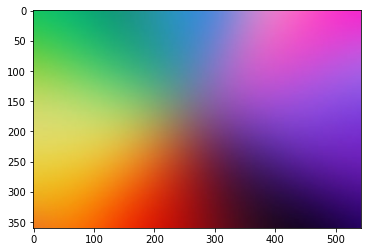

처리


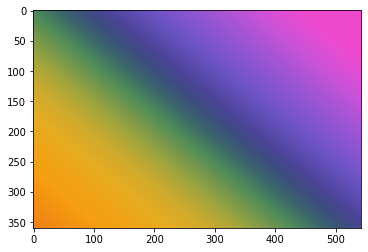

In [ ]:
testimgmodel = func3('testimg.png', 543, 360, 500, 20, 0)

In [ ]:
def resize_rgb(imgmodel, X, Y, r):
  x=int(X*r)
  y=int(Y*r)
  df=pd.DataFrame()
  df['x'] = [i/r for j in range(y) for i in range(x)]
  df['y'] = [i/r for i in range(y) for _ in range(x)]
  imgpred = imgmodel.predict(pd.DataFrame(df.astype(float)))
  plt.imshow(np.clip(imgpred.reshape(y, x, 3).astype(int), 0, 255))
  plt.show()

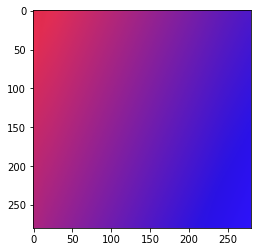

In [ ]:
resize_rgb(redbluemodel_cnn, 28, 28, 10)

In [ ]:
gradation_cnn = func3('testimg.png', 543, 360, 200, 20, 1)

In [ ]:
def func4(imgname, x, y, iter, batch,  verb):
  from tensorflow.keras.preprocessing import image
  from google.colab import files
  try:
    img = image.load_img(imgname, target_size=(y, x), color_mode="rgb")
  except:
    img = files.upload()
    img = image.load_img(imgname, target_size=(y, x), color_mode="rgb")
  img = image.img_to_array(img).astype('int')
  img = img.reshape(y, x, 3)

  import pandas as pd
  df = pd.DataFrame()
  df['x'] = [i for j in range(y) for i in range(x)]
  df['y'] = [i for i in range(y) for _ in range(x)]
  df['r'] = [img[i][j][0] for i in range(y) for j in range(x)]
  df['g'] = [img[i][j][1] for i in range(y) for j in range(x)]
  df['b'] = [img[i][j][2] for i in range(y) for j in range(x)]

  from keras.models import Sequential
  from keras.layers import Flatten, Dense, Dropout

  model_r = Sequential()
  model_r.add(Dense(2, input_dim = 2, activation = 'relu'))
  model_r.add(Dense(20, activation = 'relu'))
  model_r.add(Dense(20, activation = 'relu'))
  model_r.add(Dense(30, activation = 'relu'))
  model_r.add(Dense(40, activation = 'relu'))
  model_r.add(Dense(30, activation = 'relu'))
  model_r.add(Dense(10, activation = 'relu'))
  model_r.add(Dense(1))
  model_r.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])

  x_train = df.drop(['r', 'g', 'b'], axis = 1)
  r_train = df['r']
  
  history_r = model_r.fit(x_train, r_train, validation_data = (x_train, r_train), epochs = iter, batch_size = x*y//batch, verbose = verb)


  model_g = Sequential()
  model_g.add(Dense(2, input_dim = 2, activation = 'relu'))
  model_g.add(Dense(20, activation = 'relu'))
  model_g.add(Dense(20, activation = 'relu'))
  model_g.add(Dense(30, activation = 'relu'))
  model_g.add(Dense(40, activation = 'relu'))
  model_g.add(Dense(30, activation = 'relu'))
  model_g.add(Dense(10, activation = 'relu'))
  model_g.add(Dense(1))
  model_g.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])

  x_train = df.drop(['r', 'g', 'b'], axis = 1)
  g_train = df['g']

  history_g = model_g.fit(x_train, g_train, validation_data = (x_train, g_train), epochs = iter, batch_size = x*y//batch, verbose = verb)

  model_b = Sequential()
  model_b.add(Dense(2, input_dim = 2, activation = 'relu'))
  model_b.add(Dense(20, activation = 'relu'))
  model_b.add(Dense(20, activation = 'relu'))
  model_b.add(Dense(30, activation = 'relu'))
  model_b.add(Dense(40, activation = 'relu'))
  model_b.add(Dense(30, activation = 'relu'))
  model_b.add(Dense(10, activation = 'relu'))
  model_b.add(Dense(1))
  model_b.compile(loss = 'mae', optimizer = 'adam', metrics = ['mae'])

  x_train = df.drop(['r', 'g', 'b'], axis = 1)
  b_train = df['b']

  history_b = model_b.fit(x_train, b_train, validation_data = (x_train, b_train), epochs = iter, batch_size = x*y//batch, verbose = verb)

  rpred = model_r.predict(df.drop(['r', 'g', 'b'], axis = 1).astype(float))
  gpred = model_g.predict(df.drop(['r', 'g', 'b'], axis = 1).astype(float))
  bpred = model_b.predict(df.drop(['r', 'g', 'b'], axis = 1).astype(float))

  imgpred = []
  for i in range(y):
    for j in range(x):
      imgpred.append([rpred[i*x+j], gpred[i*x+j], bpred[i*x+j]])
  print('원본')
  plt.imshow(img.reshape(y, x, 3))
  plt.show()
  print('처리')
  plt.imshow(np.clip(np.array(imgpred).reshape(y, x, 3).astype(int), 0, 255))
  plt.show()
  return model_r, model_g, model_b

Epoch 1/200
10/10 [==============================] - 1s 57ms/step - loss: 106.6747 - mae: 106.6747 - val_loss: 90.0190 - val_mae: 90.0190
Epoch 2/200
10/10 [==============================] - 0s 38ms/step - loss: 79.8746 - mae: 79.8746 - val_loss: 71.3018 - val_mae: 71.3018
Epoch 3/200
10/10 [==============================] - 0s 40ms/step - loss: 71.3219 - mae: 71.3219 - val_loss: 72.5229 - val_mae: 72.5229
Epoch 4/200
10/10 [==============================] - 0s 40ms/step - loss: 71.4756 - mae: 71.4756 - val_loss: 70.3742 - val_mae: 70.3742
Epoch 5/200
10/10 [==============================] - 0s 38ms/step - loss: 70.5489 - mae: 70.5489 - val_loss: 70.6513 - val_mae: 70.6513
Epoch 6/200
10/10 [==============================] - 0s 38ms/step - loss: 70.4263 - mae: 70.4263 - val_loss: 70.2746 - val_mae: 70.2746
Epoch 7/200
10/10 [==============================] - 0s 39ms/step - loss: 70.2930 - mae: 70.2930 - val_loss: 70.2386 - val_mae: 70.2386
Epoch 8/200
10/10 [===========================

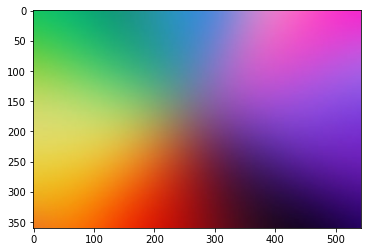

처리


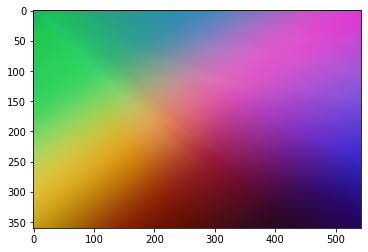

In [ ]:
testr, testg, testb = func4('testimg.png', 543, 360, 200, 10, 1)

In [ ]:
def resize_r_g_b(rmodel, gmodel, bmodel, X, Y, r):
  x=int(X*r)
  y=int(Y*r)
  df=pd.DataFrame()
  df['x'] = [i/r for j in range(y) for i in range(x)]
  df['y'] = [i/r for i in range(y) for _ in range(x)]
  imgpred = []
  r = rmodel.predict(pd.DataFrame(df.astype(float)))
  g = gmodel.predict(pd.DataFrame(df.astype(float)))
  b = bmodel.predict(pd.DataFrame(df.astype(float)))

  for i in range(y):
    for j in range(x):
      imgpred.append([r[i*x+j], g[i*x+j], b[i*x+j]])

  plt.imshow(np.clip(np.array(imgpred).reshape(y, x, 3).astype(int), 0, 255))
  plt.show()

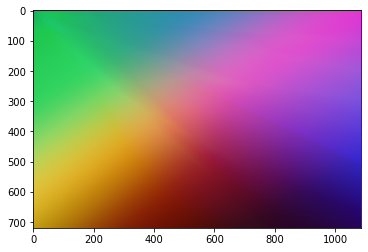

In [54]:
resize_r_g_b(testr, testg, testb, 543, 360, 2)